## Tarea 20: Ejercicio 1
 Crear una rutina que construya $A$ y $\vec b$ para este sistema. Resuelvalo utilizando la función inv y grafique $\vec f$ utilizando la funcion pcolormesh. Recuerde que aqui $\vec f$ es un vector, para volverlo de nuevo una matriz con entradas $f_{i,j}$ pueden usar la función reshape.

Debemos recordar la forma discreta de la ecuacion de laplace

$$f(x+h,y)+f(x-h,y) +f(x,y+h)+f(x,y-h)-4f(x) = 0$$

necesitaremos varias funciones auxiliares

In [3]:
#=Definimos un nuevo objeto de tipo Boundary, el cual contiene cuatro arreglos con los valores discretizados de la frontera. =#
type Boundary
   upperBoundary::Array{Float64,1}
   leftBoundary::Array{Float64,1}
   lowerBoundary::Array{Float64,1}
   rightBoundary::Array{Float64,1}
end

In [4]:
#=Nos vendran utiles las funciones que escribimos en la tarea anterior.=#
function indexer(i,j,numberOfColumns)
    #=Es una cuestión de conteo muy sencilla=#
    return (i-1)*numberOfColumns + j
end 

indexer (generic function with 1 method)

In [25]:
function inverseIndexer(numberOfColumns,index)
    
    if(index%numberOfColumns!=0)
        
        j = index%numberOfColumns
    else
        j = numberOfColumns
    end
    
    i = (index-j+numberOfColumns)/numberOfColumns
    return[i,j]
end


inverseIndexer (generic function with 1 method)

In [39]:
function laplaceMatrixGenerator(boundary::Boundary)
    #=Revisamos que las dimensiones de la frontera sean correctas de lo contrario enviamos un 
    mensaje al usuario=#
    if(size(boundary.upperBoundary)!=size(boundary.lowerBoundary) || size(boundary.leftBoundary)!=size(boundary.rightBoundary))
        println("The size of the boundary is incorrect")
    end
    
    #=Dimensiones de la cuadricula considerando la frontera=#
    n = size(boundary.leftBoundary,1)
    m = size(boundary.upperBoundary,1)
   
    
    #=Creamos la matriz y el vector=#
    A = zeros((n-2)*(m-2),(n-2)*(m-2))
    b = zeros((n-2)*(m-2))

    #=Ahora para cada uno de los puntos intermedios mandamos a llamar a una funcion que hemos creado, la
    cual llena pertinentemente la matriz A y el arreglo b =#
    
    for i in 1:n-2
        for j in 1:m-2
            fillMatrixAndVectorLaPlace(boundary,i,j,A,b,n-2,m-2)
        end 
    end
    return [A,b]
end

laplaceMatrixGenerator (generic function with 1 method)

In [40]:
function fillMatrixAndVectorLaPlace(boundary::Boundary,i,j,A,b,n,m)
    row = indexer(i,j,m)
    A[row,row] = -4
    #=Vamos a ver todos los casos,siento que es grotescamente ineficiente pero no se me ocurre otro modo.=#
    
    #=Esquina superior izquierda.=#
    if(i == 1 && j == 1)
        
        b[row]-=boundary.upperBoundary[j+1]
        b[row]-=boundary.leftBoundary[i+1]
        A[row,indexer(i+1,j,m)] = 1
        A[row,indexer(i,j+1,m)] = 1
        
    #=Esquina superior derecha=#
    elseif(i ==1 && j == m)
        
        b[row]-=boundary.upperBoundary[j+1]
        b[row]-=boundary.rightBoundary[i+1]
        A[row,indexer(i+1,j,m)] = 1
        A[row,indexer(i,j-1,m)] = 1
        
    #=Esquina inferior izquierda=#
    elseif(i == n && j ==1)
        b[row]-=boundary.lowerBoundary[j+1]
        b[row]-=boundary.leftBoundary[i+1]
        A[row,indexer(i-1,j,m)] = 1
        A[row,indexer(i,j+1,m)] = 1
        
    #=Esquina inferior derecha=#
    elseif(i == n && j ==m)
        b[row]-=boundary.lowerBoundary[j+1]
        b[row]-=boundary.rightBoundary[i+1]
        A[row,indexer(i-1,j,m)] = 1
        A[row,indexer(i,j-1,m)] = 1
        
    #=Borde superior=#    
    elseif(i == 1)
        b[row]-=boundary.upperBoundary[j+1]
        A[row,indexer(i+1,j,m)] = 1
        A[row,indexer(i,j-1,m)] = 1
        A[row,indexer(i,j+1,m)] = 1
    
    #=Borde izquierdo=#
    elseif(j ==1)
        b[row]-=boundary.leftBoundary[i+1]
        A[row,indexer(i,j+1,m)] = 1
        A[row,indexer(i-1,j,m)] = 1
        A[row,indexer(i+1,j,m)] = 1
        
    #=Borde inferior=#
    elseif(i == n)
        b[row]-=boundary.lowerBoundary[j+1]
        A[row,indexer(i-1,j,m)] = 1
        A[row,indexer(i,j+1,m)] = 1
        A[row,indexer(i,j-1,m)] = 1
    #=Borde derecho=#
    elseif(j == m)
        b[row]-=boundary.rightBoundary[i+1]
        A[row,indexer(i+1,j,m)] = 1
        A[row,indexer(i-1,j,m)] = 1 
        A[row,indexer(i,j-1,m)] = 1
    #Puntos internos
        else
        A[row,indexer(i-1,j,m)] =1
        A[row,indexer(i+1,j,m)] = 1
        A[row,indexer(i,j-1,m)] = 1
        A[row,indexer(i,j+1,m)] = 1
    end       
end

fillMatrixAndVectorLaPlace (generic function with 1 method)

In [41]:
#=La funcion reshape no hace el trabajo que buscamos, podemos usar nuestra propia version de esta funcion =#

function reshape2(b,n,m)
    A = zeros(n,m)
    #=Si no es posible reconstruir el vector b en una matriz con las dimensiones dadas, el programa enviara un mensaje=#
    if(size(b,1)!=m*n)
        println("Dimensiones de reconstruccion invalidas.")
else
    for i in 1:size(b,1)
       index = inverseIndexer(m,i) 
       A[convert(Int,index[1]),convert(Int,index[2])] = b[i] 
    end
    end
    
    return A
end

reshape2 (generic function with 1 method)

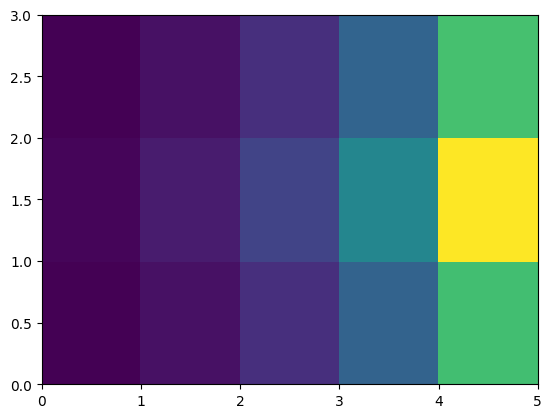

3×5 Array{Float64,2}:
 1.30862  3.38309   7.43664  15.8378  33.4918
 1.8514   4.78708  10.5256   22.4229  47.4186
 1.3099   3.38821   7.45587  15.9096  33.7597

In [42]:
#=Ahora si, utilizamos nuestra laplaceMatrixGenerator para resolver el problema=#
lowerBoundary = zeros(7)
leftBoundary = zeros(5)
rightBoundary = [0, 70.7107,100.0,71.7107,0]
upperBoundary = zeros(7)

boundary = Boundary(upperBoundary,leftBoundary,lowerBoundary,rightBoundary)
system = laplaceMatrixGenerator(boundary)

solucion = inv(system[1])*system[2]
solMatrix = reshape2(solucion,3,5)

using PyPlot
plt = PyPlot
plt.pcolormesh(solMatrix)

solMatrix



## Ejercicio 2 : Resolver ecuación de Poisson unidimensional 
Con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec f$ incluyendo las condiciones de frontera.

La forma discretizada de la ecuacion de Poisson en una dimension es:

$$\frac{f(x+h)+f(x-h)-2f(x)}{h} = \rho(x)$$

o 

$$f(x+h)+f(x-h)-2f(x) = \rho(x)h$$

In [64]:
function poissonUnidimensional(f::Function,boundary,x0,xf,numberOfPoints)
    #=Primero construimos nuestro intervalo de puntos=#
    interval = linspace(x0,xf,numberOfPoints)
    n = size(interval,1)
    h = (xf-x0)/numberOfPoints
    
    #=Construimos nuestra matriz, su dimension debe ser igual al numero de puntos menos 2=#
    A = zeros(n-2,n-2)
    b = zeros(n-2)
    
    for i in 1:n-2
        fillMatrixAndVectorPoisson(A,b,f,boundary,i,h,interval,n-2)
    end        
    
    return [A,b,interval]
end

poissonUnidimensional (generic function with 1 method)

In [65]:
function fillMatrixAndVectorPoisson(A,b,f,boundary,i,h,interval,n)
   #=Aqui por suerte solo hay tres casos=# 
    A[i,i] = -2
    if(i == 1)
        b[i] = f(interval[i+1])*h - boundary[1]
        A[i,i+1] = 1
        
    elseif(i == n)
        b[i] = f(interval[i+1])*h -boundary[2]
        A[i,i-1] = 1
        
    else
        A[i,i+1] = 1
        A[i,i-1] = 1
    end
end

fillMatrixAndVectorPoisson (generic function with 2 methods)

In [62]:
function attachBoundary(sol,boundary)
   array = zeros(size(sol,1)+2)
    for i in 1:size(array,1)
       if(i == 1)
           array[i] = boundary[1] 
        elseif(i == size(array,1))
            array[i] = boundary[2]
            
        else
            array[i] = sol[i-1]
        end
    end
    return array
end

attachBoundary (generic function with 1 method)

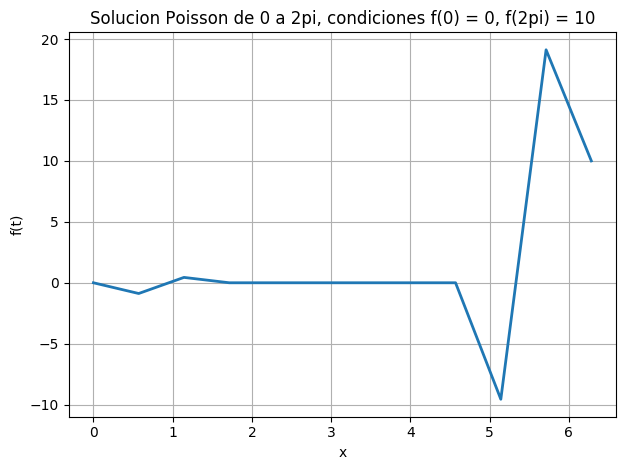

[-0.880959, 0.440479, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.55952, 19.119]


In [71]:
#=Como no nos dan las condiciones de frontera vamos a inventarlas, digamos que en el primer punto sea cero y en el ultimo 10=#

boundary = [0,10]
system = poissonUnidimensional(x->cos(x),[0,10],0,2pi,12)
sol = system[1]*system[2]
println(sol)
sol = attachBoundary(sol,boundary)

    #=Graficamos la solucion=#
    plt.xlabel("x")
    plt.ylabel("f(t)")
    plt.title("Solucion Poisson de 0 a 2pi, condiciones f(0) = 0, f(2pi) = 10")
    plt.grid()
    plt.tight_layout()
    plt.plot(system[3],sol,linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)

## Ejercicio 3
Resolver ecuación de calor en una dimensión, en el dominio $[0,1]$, con $f(0)=10$, $f(1)=0$, en una malla con 12 puntos. Aqui obviamente habrá 10 incognitas: $f_1, \dots, f_{10}$. La condición inicial que deberán usar es $\vec f^{[0]}=(5,4,3,2,1,3,5,7,7,8)^{\text{T}}$.

* Utilizando método de Euler.

* Utilizando Runge-Kutta de orden 4.

* Puede hacer este ejercicio construyendo $A$ y $\vec b$, para así utilizar las rutinas que ya tienen de RK4 y Euler, noten que aqui $A\vec f +\vec b$ define la función del sistema dinámico de $n=10$ dimensiones.

* La otra opción es implementar una rutina que aplique el laplaciano discreto a $\vec f$, digamos $\vec r= D_{h_x}[\vec f]$, de esta forma es facil construir la función que define el sistema dinámico en cada paso.

* Graficar en varios tiempos (no en todos en caso de que hagan una partición grande, solo los primeros tiempos y los últimos).

La ecuacion de calor unidimensional con conductividad 1 tiene la forma

$$\frac{df}{dt} = \frac{d^2f}{dx^2}$$

y en forma discreta esto queda 

$$\frac{f(x,t+\Delta t) -f(x,t)}{\Delta t} -\frac{f(x+h,t) +f(x-h,t)-2f(x,t)}{h} = 0$$

Vamos a hacerlo en la primera forma. debemos encontrar $A$ y $b$ tal que al aplicar $A\vec{f}+b$ a nuestro vector de funciones nos de la derivada i-esima. Ahora, de la ecuacion de calor se tiene que la derivada en el punto $(x,t)$ se puede aproximar como

$$\frac{df}{dt} =\frac{f(x+h,t) +f(x-h,t)-2f(x,t)}{h}$$


hagamos una funcion que nos construya la matrix y el vector de la derivada . 



In [40]:
function heatEquationMatrixConstructor(boundary,x0,xf,numberOfPoints)
    #=Primero construimos nuestro intervalo de puntos=#
    interval = linspace(x0,xf,numberOfPoints)
    n = size(interval,1)
    h = (xf-x0)/numberOfPoints
    
    #=Construimos nuestra matriz, su dimension debe ser igual al numero de puntos menos 2=#
    A = zeros(n-2,n-2)
    b = zeros(n-2)
    
    for i in 1:n-2
        fillMatrixAndVectorHeat(A,b,boundary,i,h,n-2)
    end        
    
    return [A,b,trimInterval(interval)]
end

heatEquationMatrixConstructor (generic function with 1 method)

In [41]:
function trimInterval(interval)
   array = zeros(size(interval,1)-2)
    for i in 1:size(interval,1)-2
       array[i] = interval[i+1] 
    end
    return array
end

trimInterval (generic function with 1 method)

In [42]:
function fillMatrixAndVectorHeat(A,b,boundary,i,h,n)
   #=Aqui por suerte solo hay tres casos=# 
    A[i,i] = -2/h
    if(i == 1)
        b[i] -= boundary[1]/h
        A[i,i+1] = 1/h
        
    elseif(i == n)
        b[i] -=boundary[2]/h
        A[i,i-1] = 1/h
        
    else
        A[i,i+1] = 1/h
        A[i,i-1] = 1/h
    end
end

fillMatrixAndVectorHeat (generic function with 1 method)

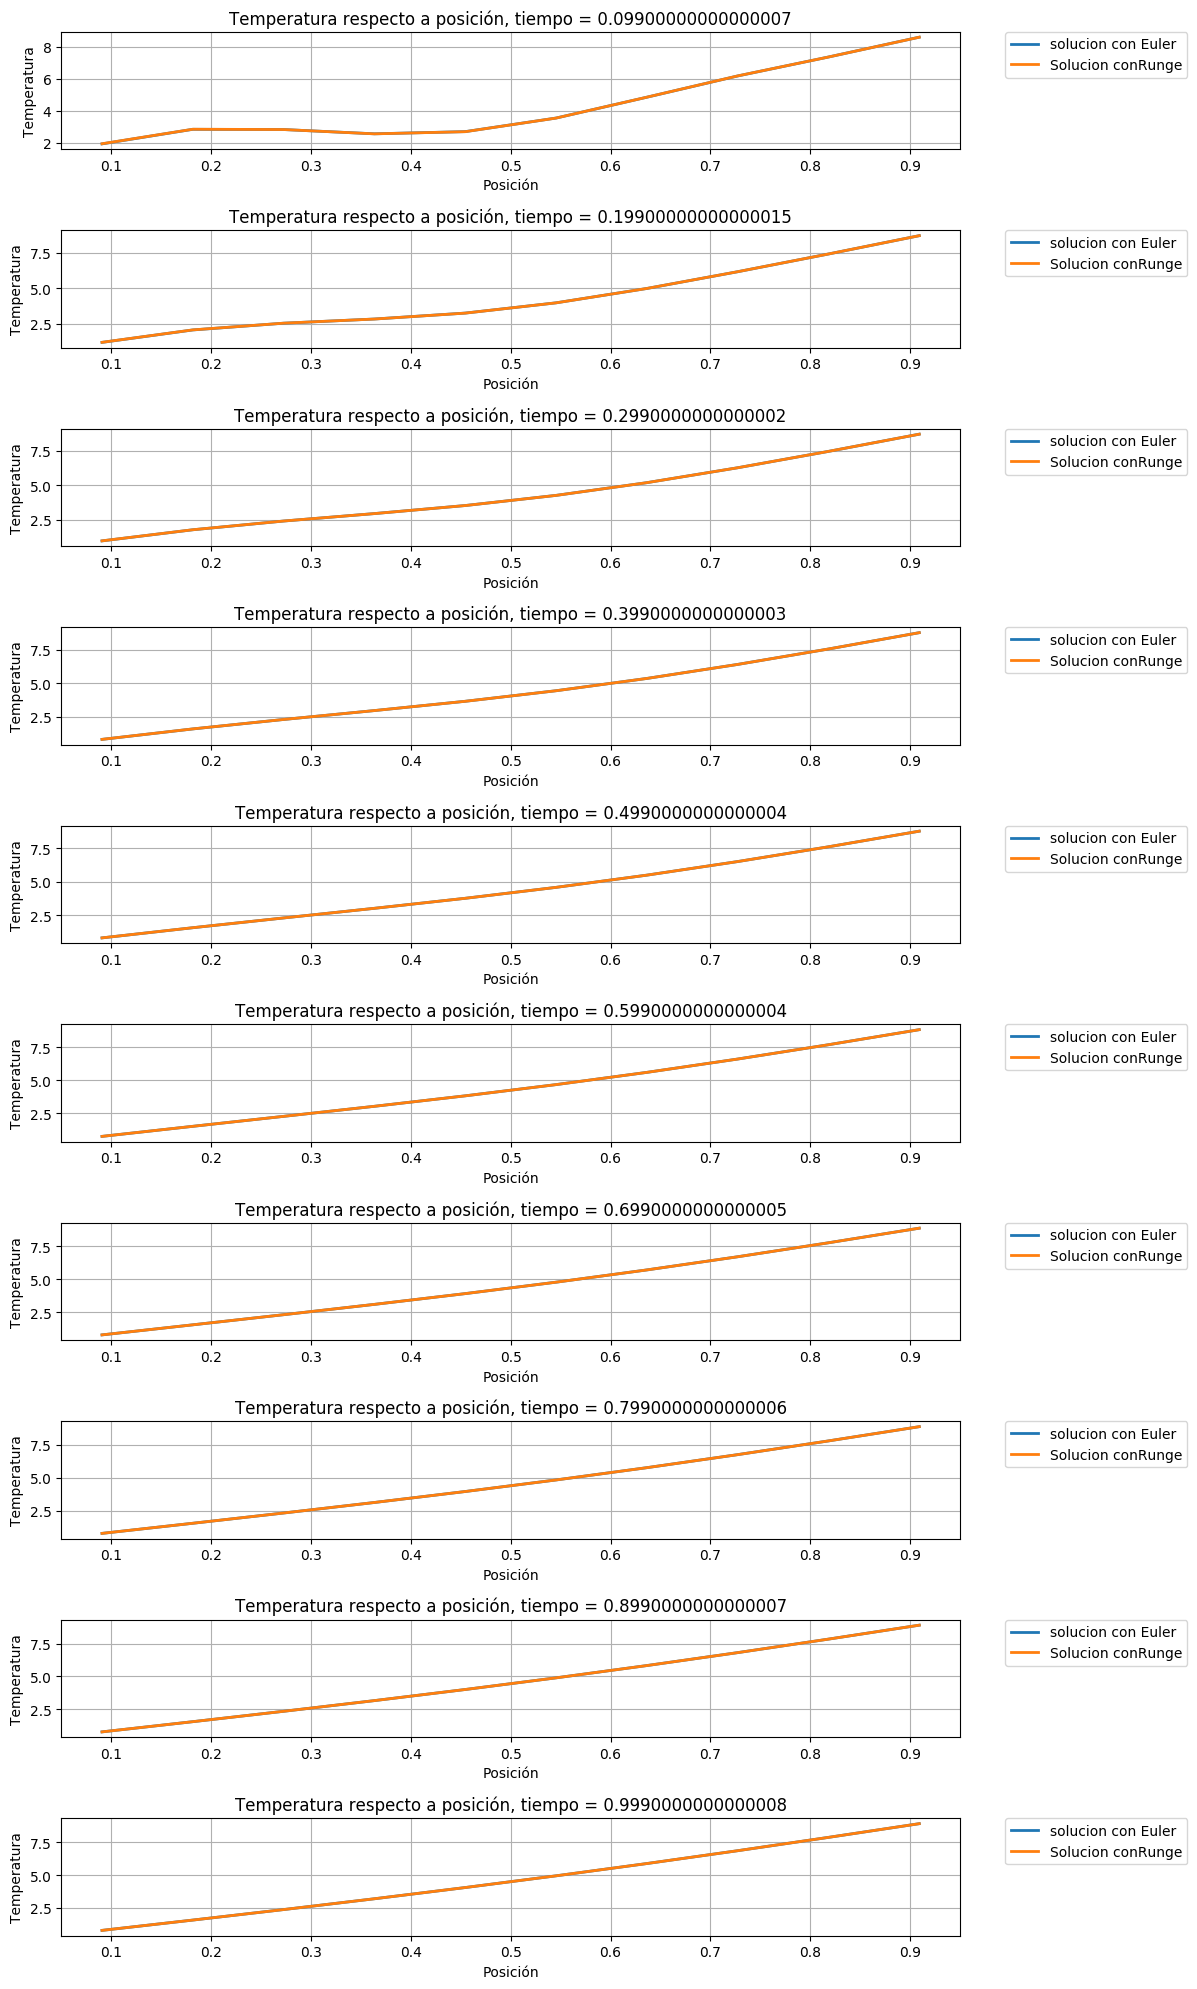

[0.787497, 1.55062, 2.28359, 3.00657, 3.75816, 4.57882, 5.49548, 6.5143, 7.62246, 8.79473]


In [45]:
#=Construimos la funcion que le pasaremos a Euler/Runge junto con las condiciones iniciales=#

sol = heatEquationMatrixConstructor([0,10],0,1,12)
f(x,t) = sol[1]*x -sol[2]
#=Copiamos el arreglo de condiciones inciiales que nos dan=#
condicionesIniciales = [5,4,3,2,1,3,5,7,7,8]
#=importamos nuestra paqueteria=#
push!(LOAD_PATH,pwd())
import herramientas
#=Resolvemos mediante Euler y RungeKutta=#
using herramientas
eulerSolucion = eulersMethod(f,0,1,condicionesIniciales,0.001)
rungeSolucion = rungeKutta4(f,0,1,condicionesIniciales,0.001)

cordExtract(x,i) = x[i]

increment = floor(size(eulerSolucion[1],1)/10)
println(eulerSolucion[2][convert(Int,5*increment)])


    using PyPlot
    plt = PyPlot
    plt.figure(figsize=(10, 20))
    for i in 1:10
    plt.subplot(10,1,i)
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title("Temperatura respecto a posición, tiempo = $(eulerSolucion[1][convert(Int,i*increment)])")
    plt.grid()
    plt.tight_layout()
    plt.plot(sol[3],eulerSolucion[2][convert(Int,i*increment)],label ="solucion con Euler",linewidth =2) 
    plt.plot(sol[3],rungeSolucion[2][convert(Int,i*increment)],label = "Solucion conRunge",linewidth = 2)
      legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    ax = gca()
end


Conforme pasa el tiempo la distribucion de temperatura se hace lineal 